In [84]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns 
from sklearn .model_selection import train_test_split
from sklearn .linear_model import LogisticRegressionCV
from sklearn .preprocessing import StandardScaler
from sklearn .metrics import accuracy_score

In [2]:
data=pd.read_csv(r"C:\Users\mdfir\Downloads\placement (2).csv")

In [3]:
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [5]:
data.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [6]:
data.duplicated().sum()

19

In [7]:
data=data.drop_duplicates()

In [8]:
data.shape

(981, 3)

In [9]:
x=data.iloc[:,0:2]
y=data.iloc[:,-1]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [11]:
x_train.head()

,cgpa,placement_exam_marks
992,6.26,12.0
629,8.15,11.0
946,7.95,12.0
33,6.23,27.0
31,7.66,44.0


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

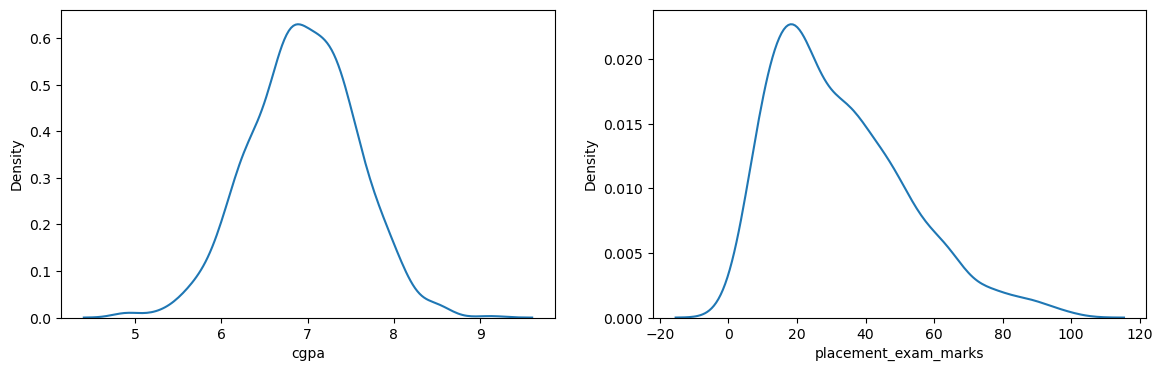

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(x_train["cgpa"])

plt.subplot(122)
sns.kdeplot(x_train["placement_exam_marks"])

# skew check 

In [14]:
x_train["cgpa"].skew() # no skude    use trimming in z-score 

-0.0904468788370706

In [15]:
x_train["placement_exam_marks"].skew() # skewed use trimming in IQR 

0.8485196849306442

# capping  cgpa 

In [17]:
upper_limit=x_train["cgpa"].mean()+3*x_train["cgpa"].std()
lower_limit=x_train["cgpa"].mean()-3*x_train["cgpa"].std()

In [18]:
upper_limit,lower_limit

(8.780869987636274, 5.116732053180053)

In [44]:
x_train["cgpa"]=np.where(
x_train["cgpa"]>upper_limit,
    upper_limit,
    np.where(
x_train["cgpa"]<lower_limit,
        lower_limit,
        x_train["cgpa"]
        
    )


    
)

In [48]:
x_train[(x_train["cgpa"]>upper_limit)| (x_train["cgpa"]<lower_limit)]

,cgpa,placement_exam_marks


# placement_exam_marks remove the outliers 

In [53]:
upper_limit=x_train["placement_exam_marks"].mean()+3*x_train["placement_exam_marks"].std()
lower_limit=x_train["placement_exam_marks"].mean()-3*x_train["placement_exam_marks"].std()

In [56]:
x_train["placement_exam_marks"]=np.where(
x_train["placement_exam_marks"]>upper_limit,
    upper_limit,
    np.where(
x_train["placement_exam_marks"]<lower_limit,
        lower_limit,
        x_train["placement_exam_marks"]))

In [58]:
x_train[(x_train["placement_exam_marks"]>upper_limit)| (x_train["placement_exam_marks"]<lower_limit)]

,cgpa,placement_exam_marks


In [62]:
x_train.head()

,cgpa,placement_exam_marks
992,6.26,12.0
629,8.15,11.0
946,7.95,12.0
33,6.23,27.0
31,7.66,44.0


In [67]:
s=StandardScaler()

In [71]:
x_train_s=s.fit_transform(x_train)
x_test_s=s.fit_transform(x_test)

In [76]:
l=LogisticRegressionCV(max_iter=20,cv=10)

In [78]:
l.fit(x_train_s,y_train)

,Cs,10
,fit_intercept,True
,cv,10
,dual,False
,penalty,'l2'
,scoring,None
,solver,'lbfgs'
,tol,0.0001
,max_iter,20
,class_weight,None
,n_jobs,None


In [80]:
pred=l.predict(x_test_s)

In [86]:
score=accuracy_score(pred,y_test)

In [88]:
score

0.48223350253807107

# without standardscaler

In [91]:
l.fit(x_train,y_train)

,Cs,10
,fit_intercept,True
,cv,10
,dual,False
,penalty,'l2'
,scoring,None
,solver,'lbfgs'
,tol,0.0001
,max_iter,20
,class_weight,None
,n_jobs,None


In [93]:
pred=l.predict(x_test)

In [95]:
score=accuracy_score(pred,y_test)

In [97]:
score

0.49238578680203043